In [1]:
# Import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [2]:
# Load the data file into a Pandas DataFrame
df = pd.read_csv('Corona_NLP_test.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [3]:
# Tokenize the text corpus
corpus = df['OriginalTweet'].apply(nltk.word_tokenize)
corpus

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [When, I, could, n't, find, hand, sanitizer, a...
2       [Find, out, how, you, can, protect, yourself, ...
3       [#, Panic, buying, hits, #, NewYork, City, as,...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, In, A, Supermarket, in, Israel, --...
3794    [Did, you, panic, buy, a, lot, of, non-perisha...
3795    [Asst, Prof, of, Economics, @, cconces, was, o...
3796    [Gov, need, to, do, somethings, instead, of, b...
3797    [I, and, @, ForestandPaper, members, are, comm...
Name: OriginalTweet, Length: 3798, dtype: object

In [4]:
# Remove stop words from the corpus
stop_words = set(stopwords.words('english'))
filtered_corpus = corpus.apply(lambda tweet_tokens: [word for word in tweet_tokens if not word.lower() in stop_words])
# Remove special characters from the corpus
filtered_corpus = filtered_corpus.apply(lambda tweet_tokens: [re.sub(r'[^A-Za-z0-9]+', '', word) for word in tweet_tokens])

In [5]:
# Create a dictionary of word frequencies
word_freq = {}
for tweet_tokens in filtered_corpus:
    for word in tweet_tokens:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

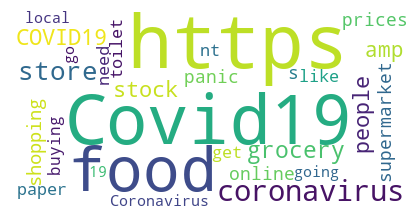

In [6]:
# Create a word cloud
wordcloud = WordCloud(background_color='white', min_font_size=10, max_words=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()